<a href="https://colab.research.google.com/github/worklifesg/Computer-Vision-Algorithms-and-Projects/blob/main/3-Siamese%20Networks/2_siamese_networks_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align='center'> Training Siamese Networks </h2>

We need three python scripts to train siamese networks
  - **config.py** - . Paths, I/P image spatial dimensions, batch size, number of epochs
  - **siamese_network.py** - CNN model using Keras, and TensorFlow
  - **utils.py** - functions related to building image pairs, computing euclidean distance, and plotting training measure history results
  
  - This is the main training notebook that constitutes above 3 python scripts
    * Load and read MNIST digit dataset (config.py)
    * Build positive and negative pairs (utils.py)
    * Build siamese network architecture (siamese_network.py)
    * Train the siamese network
    * Training History (Loss and Accuracy) - (utils.py)

#### 1. Import Libraries

In [1]:
from siamese_network import build_siamese_network
import config
import utils

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras.datasets import mnist

import numpy as np

#### 2. Load and Read MNIST digit dataset

In [2]:
from google.colab.patches import cv2_imshow

#loading MNIST dataset
(trainX,trainY), (testX,testY) = mnist.load_data()

#scaling the images [0,1]
trainX = trainX/255.0
testX = testX/255.0

# adding a channel dimension to images
trainX = np.expand_dims(trainX,axis=-1)
testX = np.expand_dims(testX,axis=-1)

11493376/11490434 [==============================] - 0s 0us/step


#### 3. Building positive and negative pairs

In [3]:
#loading positive and negative pairs
(pairTrain, labelTrain) = utils.make_pairs(trainX,trainY)
(pairTest,labelTest) = utils.make_pairs(testX,testY)

#### 4. Siamese Network Archiecture Build

In [4]:
# configure the network

imageA = Input(shape=config.image_shape)
imageB = Input(shape=config.image_shape)

feature_ext = build_siamese_network(config.image_shape)

featsA = feature_ext(imageA)
featsB = feature_ext(imageB)

# contruct the network

distance = Lambda(utils.euclidean_distance)([featsA,featsB])
outputs = Dense(1,activation='sigmoid')(distance)
model = Model(inputs=[imageA,imageB],outputs=outputs)

#### 5. Compile and Train Model


In [5]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit([pairTrain[:,0],pairTrain[:,1]],
                    labelTrain[:],
                    validation_data=([pairTest[:,0],pairTest[:,1]],labelTest[:]),
                    batch_size = config.batch_size,
                    epochs=config.epochs)

Epoch 1/100
1875/1875 [==============================] - 44s 23ms/step - loss: 0.6449 - accuracy: 0.5980 - val_loss: 0.5435 - val_accuracy: 0.7501
Epoch 2/100
1875/1875 [==============================] - 40s 22ms/step - loss: 0.5524 - accuracy: 0.7277 - val_loss: 0.4800 - val_accuracy: 0.7861
Epoch 3/100
1875/1875 [==============================] - 42s 23ms/step - loss: 0.5040 - accuracy: 0.7566 - val_loss: 0.4424 - val_accuracy: 0.8006
Epoch 4/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4791 - accuracy: 0.7711 - val_loss: 0.4187 - val_accuracy: 0.8123
Epoch 5/100
1875/1875 [==============================] - 42s 23ms/step - loss: 0.4621 - accuracy: 0.7815 - val_loss: 0.4003 - val_accuracy: 0.8213
Epoch 6/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4488 - accuracy: 0.7898 - val_loss: 0.3795 - val_accuracy: 0.8317
Epoch 7/100
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4334 - accuracy: 0.8025 - val_loss: 0

#### 6. Model save and plot history

In [6]:
model.save(config.model_path)

INFO:tensorflow:Assets written to: output/siamese_model/assets


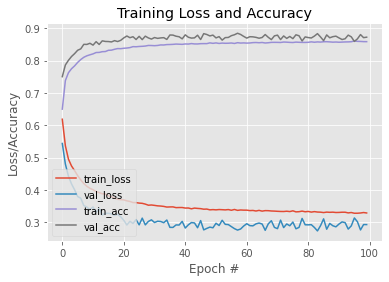

In [7]:
utils.plot_training(history,config.plot_path)

The model obtained around 88% of accuracy on testing dataset

In [10]:
!zip -r /content/output.zip /content/output

  adding: content/output/ (stored 0%)
  adding: content/output/siamese_model/ (stored 0%)
  adding: content/output/siamese_model/variables/ (stored 0%)
  adding: content/output/siamese_model/variables/variables.index (deflated 65%)
  adding: content/output/siamese_model/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: content/output/siamese_model/saved_model.pb (deflated 89%)
  adding: content/output/siamese_model/assets/ (stored 0%)
  adding: content/output/plot.png (deflated 5%)
